In [4]:
#import needed libraries
import pkg_resources
import numpy as np
import joblib

In [5]:
#Note: the profanity checker package may not be able to run if not installed onto device
#Reference the given outputs or the HTML file if unable to run

#for profanity checker
vectorizer = joblib.load(
    pkg_resources.resource_filename("profanity_check", "data/vectorizer.joblib"))

In [6]:
#for profanity checker
model = joblib.load(
    pkg_resources.resource_filename("profanity_check", "data/model.joblib")
)

In [7]:
#functions for profanity checker
def _get_profane_prob(prob):
    return prob[1]


def predict(texts):
    """Predict texts array"""
    return model.predict(vectorizer.transform(texts))


def predict_prob(texts):
    """Predict texts array returning probabilities"""
    return np.apply_along_axis(
        _get_profane_prob, 1, model.predict_proba(vectorizer.transform(texts))
    )

In [8]:
import nltk
from nltk import FreqDist

In [9]:
#imports looking for alaska text file
file_content_lfa = open("looking-for-alaska-converted2.txt", mode='r', encoding='utf-8').read()

In [10]:
#tokenizes looking for alaska
textsplit_lfa = nltk.sent_tokenize(file_content_lfa)
tokentext_lfa = [nltk.word_tokenize(sent) for sent in textsplit_lfa]

In [11]:
#functions which will take a list of lists and convert it into a list
def flatten(t):
    return [item for sublist in t for item in sublist]

In [12]:
#converts the list of lists into one list
words_list_lfa = flatten(tokentext_lfa)

In [13]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~”“’'''
 
# Removing punctuations in string
# Using loop + punctuation string
for ele in words_list_lfa:
    if ele in punc:
        words_list_lfa.remove(ele)

In [14]:
#imports the fault in our stars text file
file_content_tfios = open("the-fault-in-our-stars-converted.txt", mode='r', encoding='utf-8').read()

In [15]:
#tokenizes the fault in our stars
textsplit_tfios = nltk.sent_tokenize(file_content_tfios)
tokentext_tfios = [nltk.word_tokenize(sent) for sent in textsplit_tfios]

In [16]:
#flatteds the list of list into one list
words_list_tfios = flatten(tokentext_tfios)

In [17]:
#removes all punctuations
for ele in words_list_tfios:
    if ele in punc:
        words_list_tfios.remove(ele)

In [18]:
#number of words in looking for alaska
len(words_list_lfa)

78874

In [19]:
#number of words in the fault in our stars
len(words_list_tfios)

71720

In [20]:
#number of possibily offensive words for looking for alaska
sum(predict(words_list_lfa))

863

In [21]:
#number of offensive words for the fault in our stars
sum(predict(words_list_tfios))

1034

In [22]:
#average probability a given word would be considered offensive for looking for alaska
sum(predict_prob(words_list_lfa))/len(words_list_lfa)

0.06257085630985301

In [23]:
#average probability a given word would be considered offensive for the fault in our stars
sum(predict_prob(words_list_tfios))/len(words_list_tfios)

0.06349811000534476

In [24]:
#percent offensive words for looking for alaska
863/76753

0.011243860174846586

In [25]:
#percent offensive words for the fault in our stars
1034/71720

0.01441717791411043

In [26]:
nltkstopwords = nltk.corpus.stopwords.words('english')

In [27]:
morestopwords = ['could','would','might','must','need','sha','wo','y',"'s","'d","'ll","'t","'m","'re","'ve"]
stopwords = nltkstopwords + morestopwords

In [28]:
import re
# this regular expression pattern matches any word that contains all non-alphabetical
#   lower-case characters [^a-z]+
# the beginning ^ and ending $ require the match to begin and end on a word boundary 
pattern = re.compile('^[^a-z]+$')
nonAlphaMatch = pattern.match('**')

#  if it matched, print a message
if nonAlphaMatch: 'matched non-alphabetical'
def alpha_filter(w):
  # pattern to match a word of non-alphabetical characters
    pattern = re.compile('^[^a-z]+$')
    if (pattern.match(w)):
        return True
    else:
        return False

In [29]:
#converts all words into lowercase
lfa_words = [w.lower( ) for w in words_list_lfa]
tfios_words = [w.lower( ) for w in words_list_tfios]

In [30]:
#removes the non-alpha words
alphawords_lfa = [w for w in lfa_words if not alpha_filter(w)]
alphawords_tfios = [w for w in tfios_words if not alpha_filter(w)]

In [31]:
#removes all the stopwords
stoppedwords_lfa = [w for w in alphawords_lfa if not w in stopwords]
stoppedwords_tfios = [w for w in alphawords_tfios if not w in stopwords]

In [32]:
#top 50 words and frequency in looking for alaksa
lfa_dist = FreqDist(stoppedwords_lfa)
lfa_items = lfa_dist.most_common(50)
for item in lfa_items:
  print(item)

('said', 665)
('colonel', 507)
('alaska', 338)
('like', 326)
('one', 226)
('know', 222)
('takumi', 203)
('us', 171)
('back', 160)
('asked', 157)
('got', 148)
('never', 142)
('get', 140)
('room', 134)
('last', 130)
('eagle', 128)
('thought', 127)
('even', 124)
('time', 123)
('going', 121)
('go', 117)
('think', 114)
('walked', 110)
('well', 109)
('day', 109)
('pudge', 106)
('lara', 105)
('right', 100)
('sat', 100)
('still', 99)
('felt', 95)
('looked', 94)
('yeah', 92)
('way', 92)
('told', 91)
('want', 90)
('much', 89)
('first', 88)
('see', 86)
('creek', 85)
('people', 83)
('school', 81)
('two', 80)
('good', 78)
('words', 78)
('say', 77)
('something', 77)
('god', 77)
('head', 76)
('really', 75)


In [33]:
#top 50 words in the fault in our stars
tfios_dist = FreqDist(stoppedwords_tfios)
tfios_items = tfios_dist.most_common(50)
for item in tfios_items:
  print(item)

('said', 901)
('augustus', 338)
('like', 330)
('mom', 249)
('gus', 209)
('asked', 182)
('isaac', 168)
('know', 165)
('one', 163)
('hazel', 153)
('us', 139)
('back', 138)
('get', 136)
('dad', 131)
('okay', 129)
('go', 121)
('got', 118)
('van', 118)
('really', 117)
('want', 116)
('time', 111)
('even', 111)
('houten', 109)
('see', 105)
('people', 102)
('cancer', 99)
('still', 97)
('something', 94)
('took', 92)
('little', 91)
('around', 90)
('told', 84)
('good', 84)
('felt', 83)
('never', 82)
('way', 81)
('room', 80)
('going', 80)
('yeah', 80)
('love', 78)
('right', 75)
('think', 75)
('made', 75)
('peter', 74)
('thing', 73)
('waters', 72)
('kind', 71)
('looked', 71)
('hand', 71)
('say', 70)


In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

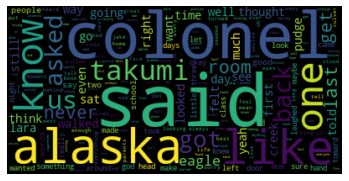

In [35]:
wcloudLFA = WordCloud().generate_from_frequencies(lfa_dist)
 
# Plotting the wordcloud
plt.imshow(wcloudLFA, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

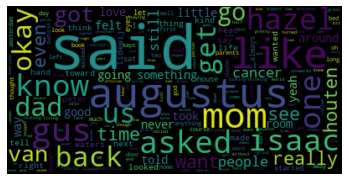

In [36]:
wcloudTFIOS = WordCloud().generate_from_frequencies(tfios_dist)
 
# Plotting the wordcloud
plt.imshow(wcloudTFIOS, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

### Lets create a model to predict whether a word is considered profanity or not. Additionally, lets take a look at sentiment to better understand how negative these books really are.

In [31]:
import random
import csv

#importing a list of all profanity words in looking for alaska
lfa_profanity = []

with open('Offensive_words_lfa.csv', 'rU') as csvfile:
    ALReader = csv.reader(csvfile, delimiter=',')
    for p in ALReader:
        word = p[0]
        lfa_profanity.append(word)
        


/var/folders/w0/3jsxv1cs5_d2k2zsqqxw6_jw0000gn/T/ipykernel_77359/625368035.py:7: DeprecationWarning: 'U' mode is deprecated
  with open('Offensive_words_lfa.csv', 'rU') as csvfile:


In [32]:
tfios_profanity = []

with open('Offensive_words_tfios.csv', 'rU') as csvfile:
    ALReader = csv.reader(csvfile, delimiter=',')
    for p in ALReader:
        word = p[0]
        tfios_profanity.append(word)

/var/folders/w0/3jsxv1cs5_d2k2zsqqxw6_jw0000gn/T/ipykernel_77359/611529530.py:3: DeprecationWarning: 'U' mode is deprecated
  with open('Offensive_words_tfios.csv', 'rU') as csvfile:


In [33]:
#create one giant list of "profanity" words
profanity = []

for word in lfa_profanity:
    profanity.append(word)

for word in tfios_profanity:
    profanity.append(word)

#print the first 10 profanity words
print(profanity[:10])

['sits', 'useless', 'Dare', 'kill', 'badass', 'piss', 'mental', 'whitey', 'shoot', 'porn']


In [34]:
#creating a frequency distribution of just the profanity keywords in each corpus

#looking for alaska
lfa_prof = []
for word in stoppedwords_lfa:
    if word in profanity:
        lfa_prof.append(word)
                
lfa_prof_dist = FreqDist(lfa_prof)
lfa_prof_items = lfa_prof_dist.most_common(50)
for item in lfa_prof_items:
  print(item)

('mom', 74)
('shit', 41)
('mouth', 37)
('die', 32)
('white', 32)
('hell', 31)
('hate', 21)
('pissed', 21)
('stupid', 19)
('worst', 19)
('ass', 16)
('damn', 16)
('hole', 16)
('wet', 15)
('sex', 15)
('smell', 12)
('knees', 12)
('rat', 11)
('fuck', 11)
('drove', 11)
('killed', 10)
('blow', 10)
('naked', 9)
('eat', 9)
('porn', 9)
('shut', 9)
('throat', 8)
('kill', 8)
('butt', 8)
('bitch', 8)
('dumb', 8)
('fucking', 8)
('bunch', 7)
('ridiculous', 7)
('die.', 7)
('lame', 7)
('shit.', 6)
('screw', 6)
('spit', 6)
('fucked', 6)
('asshole', 5)
('suck', 5)
('penis', 5)
('puke', 5)
('fat', 4)
('assholes', 4)
('sucked', 4)
('silly', 4)
('piss', 4)
('goddamn', 4)


In [35]:
#the fault in our stars
tfios_prof = []
for word in stoppedwords_tfios:
    if word in profanity:
        tfios_prof.append(word)
                
tfios_prof_dist = FreqDist(tfios_prof)
tfios_prof_items = tfios_prof_dist.most_common(50)
for item in tfios_prof_items:
  print(item)

('mom', 249)
('cancer', 99)
('die', 32)
('drove', 27)
('mouth', 26)
('sick', 18)
('brain', 16)
('kill', 15)
('stupid', 15)
('eat', 14)
('basement', 11)
('shut', 11)
('hate', 11)
('hell', 10)
('white', 10)
('smell', 10)
('bullshit', 10)
('dumb', 10)
('freaking', 9)
('butt', 9)
('clouds', 7)
('suck', 6)
('shit', 6)
('bunch', 6)
('pissed', 6)
('balls', 5)
('sucked', 5)
('worst', 5)
('throat', 5)
('sucks', 5)
('crap', 5)
('ugly', 5)
('horrible', 5)
('ridiculous', 5)
('fat', 4)
('goddamn', 4)
('pretentious', 4)
('pathetic', 4)
('frankly', 4)
('mom.', 4)
('grow', 4)
('piss', 4)
('bastard', 4)
('misery', 3)
('lazy', 3)
('cancer.', 3)
('silly', 3)
('evil', 3)
('puke', 3)
('sucks.', 3)


In [36]:
#using the 50 most common words, and the 50 most common profanity words, we will create a bag of words to use as features 
#(removing duplicates)

#combine the two items for looking for alaska
lfa_bows = []
for word in lfa_items:
    lfa_bows.append(word)

for word in lfa_prof_items:
    if word in lfa_bows:
        continue
    else:
        lfa_bows.append(word)
          
lfa_word_features = [word for (word, freq) in lfa_bows]

#combine the two items for the fault in our stars
tfios_bows = []
for word in tfios_items:
    tfios_bows.append(word)

for word in tfios_prof_items:
    if word in tfios_bows:
        continue
    else:
        tfios_bows.append(word)
          
tfios_word_features = [word for (word, freq) in tfios_bows]

#add the features together
word_features = []
for word in lfa_word_features:
    word_features.append(word)
for word in tfios_word_features:
    if word in word_features:
        continue
    else:
        word_features.append(word)

In [37]:
#label each word in each corpus with either 'prof' for profanity or 'not' for not profanity add create a giant document 
#combining both books 
#we will use this to train the naive bayes

#LFA
documents = []
for word in words_list_lfa:
    if word in profanity:
        documents.append((word, 'prof'))
    else:
        documents.append((word, 'not'))

#TFIOS  
for word in words_list_tfios:
    if word in profanity:
        documents.append((word, 'prof'))
    else:
        documents.append((word, 'not'))

In [38]:
#create the document features where the value of the feature is a Boolean according to if the word is contained in the document

def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    return features

random.shuffle(documents)

#define the featuresets
featuresets = [(document_features(d, word_features),c) for (d,c) in documents]
len(featuresets)


150594

In [39]:
#do a 90% 10% train test split
import math
train_number = math.floor(len(featuresets)*.9)

train_set, test_set = featuresets[train_number:], featuresets[:train_number]

In [40]:
#run the naive bayes and predict accuracy on test set
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.9874570218542948


### Here we can see the accuracy was around 0.9886. It seems to be because there are so few profanity words that every word in the corpus is being marked as "not profanity"

### We will now use the built in nltk sentiment intensity analyzer to predict the sentiment of the books. 

In [41]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nataliauruska/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [42]:
#get the sentiment polarity of looking for alaska
sia.polarity_scores(file_content_lfa)

{'neg': 0.092, 'neu': 0.794, 'pos': 0.114, 'compound': 1.0}

In [43]:
#get the sentiment polarity of the fault in our stars
sia.polarity_scores(file_content_tfios)

{'neg': 0.092, 'neu': 0.779, 'pos': 0.129, 'compound': 1.0}

In [49]:
#label each word in the corpus pos neu or neg
lfa_sent_corpus = []
for word in stoppedwords_lfa:
    d = sia.polarity_scores(word)
    if d['neg'] == 1:
        lfa_sent_corpus.append((word, 'neg'))
    if d['pos'] == 1:
        lfa_sent_corpus.append((word, 'pos'))
    if d['neu'] == 1:
        lfa_sent_corpus.append((word, 'neu'))
    
tfios_sent_corpus = []
for word in stoppedwords_tfios:
    d = sia.polarity_scores(word)
    if d['neg'] == 1:
        tfios_sent_corpus.append((word, 'neg'))
    if d['pos'] == 1:
        tfios_sent_corpus.append((word, 'pos'))
    if d['neu'] == 1:
        tfios_sent_corpus.append((word, 'neu'))

In [50]:
#combine the corpus
documents_sent = []
for line in lfa_sent_corpus:
    documents_sent.append(line)
for line in tfios_sent_corpus:
    documents_sent.append(line)

In [51]:
#define the featuresets
random.shuffle(documents_sent)
featuresets_sent = [(document_features(d, word_features),c) for (d,c) in documents_sent]
len(featuresets_sent)

67354

In [52]:
#do a 90% 10% train test split
import math
train_number_sent = math.floor(len(featuresets_sent)*.9)

train_set_sent, test_set_sent = featuresets_sent[train_number_sent:], featuresets_sent[:train_number_sent]

In [53]:
#run the naive bayes and predict accuracy on test set
classifier_sent = nltk.NaiveBayesClassifier.train(train_set_sent)
print(nltk.classify.accuracy(classifier_sent, test_set_sent))

0.8441881949255997


### Here we can see the accuracy was around 0.84. This may differ depending on randomization. 

In [54]:
#check to see how much pos, neu and neg were predicted
countPos = 0
countNeu = 0
countNeg = 0

predictedlist = []
goldlist = []

for (features, label) in test_set_sent:
    goldlist.append(label)
    predictedlist.append(classifier_sent.classify(features))

for lab in predictedlist:
    if lab == 'pos':
        countPos += 1
    if lab == 'neg':
        countNeg += 1
    if lab == 'neu':
        countNeu += 1
        
        
print('number of predicted positive:', countPos, '\n',
     'number of predicted negative:', countNeg, '\n',
     'number of predicted neutral:', countNeu, '\n')

number of predicted positive: 0 
 number of predicted negative: 0 
 number of predicted neutral: 60618 



### Note: the Naive Bayes model only predicted neutral for all words in the test group. 

## Using Cross Validation to obtain precision, recall and F-measure scores

In [55]:
#function to compute precision, recall and F1 for if the algorithm accurately predicted profanity
#returns a dictionary of mean precision, recall and f1 
#this function is adjusted to be able to handle when all values are predicted as one label

def eval_measure(gold, predicted):
    #gather a list of the labels
    labels = list(set(gold))
    
    #instantiate recall list, precision list and f1 list
    recall_list = []
    precision_list = []
    f1_list = []
   
    #find the true positives, true negatives, false positives and false negatives for each label and use it to calculate
    #recall precision and f1
    for lab in labels:
        TP = FP = FN = TN = 0
        for i, val in enumerate(gold):
            if val == lab and predicted[i]==lab: TP += 1
            if val == lab and predicted[i]!=lab: FN += 1
            if val != lab and predicted[i]==lab: FP += 1
            if val != lab and predicted[i]!=lab: TN += 1
        
            #calculate recall, precision and f1 and add them to the list
            #note if TP=0 then precision and recall will both = 0, and f1 will = 0 as well
            if (TP == 0):
                recall = 0
                precision = 0
                recall_list.append(0)
                precision_list.append(0)
            else:
                recall = TP/(TP+FP)
                precision = TP/(TP+FN)
                recall_list.append(recall)
                precision_list.append(precision)
                f1_list.append (2 * (recall*precision)/(recall+precision))
    
    #find the mean recall, precision and f1 from each list
    mean_recall = sum(recall_list)/len(recall_list)
    mean_precision = sum(precision_list)/len(precision_list)
    mean_f1 = sum(f1_list)/len(f1_list)
    
    
    #return a dict with each of the means
    rpf_dict = {'recall': mean_recall, 'precision': mean_precision, 'f1': mean_f1}
    
    return rpf_dict
        

In [56]:
#define the cross validation function
def cross_validation(num_folds, featuresets):
    subset_size = len(featuresets)/num_folds
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    #iterate over the folds
    for i in range(num_folds):
        if i == 0:
            test_this_round = featuresets[:int(subset_size)]
            train_this_round = featuresets[int(subset_size):]
        if i == num_folds-1:
            test_this_round = featuresets[int(i*subset_size):]
            train_this_round = featuresets[:int(i*subset_size)]
        else:
            test_this_round = featuresets[int(i*subset_size):int((i+1)*subset_size)]
            train_this_round = featuresets[:int(i*subset_size)]+featuresets[int((i+1)*subset_size):]

        train_this_round = featuresets[:int(i*subset_size)]+featuresets[int((i+1)*subset_size):]
        #train 
        classifier = nltk.NaiveBayesClassifier.train(train_this_round)
        #evaluate against test this round and save accuracy, precision, recall and f-measure
       
        #accuracy
        accuracy_this_round = nltk.classify.accuracy(classifier, test_this_round)
        accuracy_list.append(accuracy_this_round)
        
        #calculate recall, precision and f1
        
        predictedlist = []
        goldlist = []

        for (features, label) in test_this_round:
            goldlist.append(label)
            predictedlist.append(classifier.classify(features))
        
        rpf_dict = eval_measure(goldlist, predictedlist)
        
        #precision
        precision = rpf_dict['precision']
        precision_list.append(precision)
        
        #recall
        recall = rpf_dict['recall']
        recall_list.append(recall)
        
        #f1
        f1 = rpf_dict['f1']
        f1_list.append(f1)
        
    #find mean for all measures and print
    mean_accuracy = sum(accuracy_list)/num_folds
    mean_precision = sum(precision_list)/num_folds
    mean_recall = sum(recall_list)/num_folds
    mean_f1 = sum(f1_list)/num_folds

    print('mean accuracy', mean_accuracy, '\n', 'mean precision', mean_precision, '\n', 
          'mean recall', mean_recall, '\n', 'mean f1', mean_f1)
        
#use 5 folds
cross_validation(5, featuresets_sent)

mean accuracy 0.843765829392811 
 mean precision 0.3333234355281716 
 mean recall 0.28104202519078864 
 mean f1 0.9148724414084363


### Here we can see that 

mean accuracy is 0.84 
 mean precision is 0.33
 mean recall is 0.28 
 and mean f1 is 0.91
 
Note this may be different due to randomization

In [309]:
#Exploring overlap of profanity in both corpuses
lfa_profanity = [w.lower( ) for w in lfa_profanity]
tfios_profanity = [w.lower( ) for w in tfios_profanity]


lfa_profanity = [s.replace(".", "") for s in lfa_profanity]
tfios_profanity=[s.replace(".", "") for s in tfios_profanity]

prof_overlap=[]

for word in lfa_profanity:
    if word in tfios_profanity:
        prof_overlap.append(word)
        
updated = []
for i in prof_overlap:
    if i not in updated:
        updated.append(i)

#printing first 10 overlapping words
print(updated[:10])

#total overlapping profane words from both books
len(updated)

['useless', 'kill', 'badass', 'piss', 'mental', 'shoot', 'porn', 'bitch', 'shit', 'crap']


79

In [310]:
#Exploring overlap of all words in both books
#removing periods
stoppedwords_lfa = [s.replace(".", "") for s in stoppedwords_lfa]
stoppedwords_tfios = [s.replace(".", "") for s in stoppedwords_tfios]

In [311]:
#creating list of all overlapping words
both_overlap=[]

for word in stoppedwords_lfa:
    if word in stoppedwords_tfios:
        both_overlap.append(word)

In [312]:
#removing any duplicates
both_updated = []
for i in both_overlap:
    if i not in both_updated:
        both_updated.append(i)

In [313]:
len(both_updated)

2993

In [314]:
#taking out the LFA profanity from reg 'clean' words
for i in both_updated:
    if i in lfa_profanity:
        both_updated.remove(i)

In [315]:
len(both_updated)

2916

In [316]:
#taking out the TFIOS profanity from reg 'clean' words
for i in both_updated:
    if i in tfios_profanity:
        both_updated.remove(i)

In [317]:
#final length of overlapping regular aka 'clean' words
len(both_updated)

2914

In [318]:
#printing first 20 overlapping 'clean' words
print(both_updated[:20])

['everybody', 'sitting', 'sleeping', 'bags', 'alaska', 'smoking', 'overwhelming', 'pulled', 'single', 'piece', 'computer', 'paper', 'read', 'point', 'evening', 'weekday', 'also', 'opportunity', 'make', 'life']


In [319]:
#POS Tagging of overlapped profanity to prep for SentiWordNet
tagged = nltk.pos_tag(updated)

#Viewing first 5 tagged
print(tagged[:5])

[('useless', 'JJ'), ('kill', 'NN'), ('badass', 'NN'), ('piss', 'JJ'), ('mental', 'JJ')]


In [320]:
#POS Tagging of overlapped clean words to prep for SentiWordNet
clean_tagged = nltk.pos_tag(both_updated)

#Viewing first 5 tagged
print(clean_tagged[:5])

[('everybody', 'NN'), ('sitting', 'VBG'), ('sleeping', 'VBG'), ('bags', 'NNS'), ('alaska', 'RB')]


In [321]:
#SentiWordNet Lex for overlapping profanity/clean words in both LFA and FIOS
#Works with WordNet synsets, score will be assigned based on word meaning

from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import PorterStemmer

def penn_to_wn(tag):

#Converting between the PennTreebank tags to simple Wordnet tags

    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [322]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def get_sentiment(word,tag):

#This will return list of pos, neg, and objective scores. Will return empty list if not present in SentiWordNet

    wn_tag = penn_to_wn(tag)
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [word,swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

In [323]:
#Checking sentiment for profanity overlap
senti_val = [get_sentiment(x,y) for (x,y) in tagged]

In [324]:
#Viewing first 10 sentiments
print(senti_val[:10])

[['useless', 0.125, 0.625, 0.25], ['kill', 0.0, 0.0, 1.0], [], [], ['mental', 0.125, 0.0, 0.875], ['shoot', 0.125, 0.0, 0.875], [], ['bitch', 0.0, 0.75, 0.25], ['shit', 0.0, 0.25, 0.75], ['crap', 0.0, 0.25, 0.75]]


In [325]:
#Checking sentiment for clean overlap
senti_clean = [get_sentiment(x,y) for (x,y) in clean_tagged]

In [326]:
#Viewing first 50 sentiments
print(senti_clean[:50])

[[], [], [], ['bags', 0.0, 0.0, 1.0], [], [], [], [], ['single', 0.0, 0.0, 1.0], ['piece', 0.0, 0.0, 1.0], ['computer', 0.0, 0.0, 1.0], ['paper', 0.0, 0.0, 1.0], [], ['point', 0.0, 0.0, 1.0], [], ['weekday', 0.0, 0.0, 1.0], ['also', 0.0, 0.0, 1.0], ['opportunity', 0.5, 0.0, 0.5], [], ['life', 0.0, 0.0, 1.0], ['unpleasant', 0.125, 0.625, 0.25], ['eagle', 0.0, 0.0, 1.0], ['always', 0.0, 0.0, 1.0], ['welcome', 0.5, 0.0, 0.5], ['pleasure', 0.0, 0.0, 1.0], [], [], ['tonight', 0.0, 0.0, 1.0], ['battle', 0.0, 0.0, 1.0], [], ['front', 0.0, 0.0, 1.0], [], ['light', 0.0, 0.25, 0.75], ['fire', 0.0, 0.0, 1.0], [], [], ['mission', 0.0, 0.0, 1.0], [], [], [], [], ['interrupted', 0.0, 0.0, 1.0], ['idea', 0.125, 0.0, 0.875], ['okay', 0.625, 0.0, 0.375], ['fine', 0.375, 0.0, 0.625], [], ['finally', 0.0, 0.0, 1.0], [], ['network', 0.0, 0.0, 1.0], ['use', 0.0, 0.0, 1.0]]


In [327]:
#Turning prof overlap and clean overlap and into dfs for easy viewing
import pandas as pd
profanitydf = pd.DataFrame(senti_val)
cleandf = pd.DataFrame(senti_clean)

In [328]:
#Renaming columns
profanitydf.columns =['Word', 'Pos_score', 'Neg_score', 'Obj_score']
cleandf.columns =['Word', 'Pos_score', 'Neg_score', 'Obj_score']

In [329]:
#Making Word the index
profanitydf.set_index('Word')
cleandf.set_index('Word')

profanitydf.head()

,Word,Pos_score,Neg_score,Obj_score
0,useless,0.125,0.625,0.250
1,kill,0.000,0.000,1.000
2,None,NaN,NaN,NaN
3,None,NaN,NaN,NaN
4,mental,0.125,0.000,0.875


In [330]:
cleandf.head()

,Word,Pos_score,Neg_score,Obj_score
0,None,NaN,NaN,NaN
1,None,NaN,NaN,NaN
2,None,NaN,NaN,NaN
3,bags,0.0,0.0,1.0
4,None,NaN,NaN,NaN


In [331]:
#Dropping any NAs we have in profanity df
profanitydf=profanitydf.dropna()
profanitydf.head()

,Word,Pos_score,Neg_score,Obj_score
0,useless,0.125,0.625,0.250
1,kill,0.000,0.000,1.000
4,mental,0.125,0.000,0.875
5,shoot,0.125,0.000,0.875
7,bitch,0.000,0.750,0.250


In [332]:
#Dropping any NAs we have in clean df
cleandf=cleandf.dropna()
cleandf.head()

,Word,Pos_score,Neg_score,Obj_score
3,bags,0.0,0.0,1.0
8,single,0.0,0.0,1.0
9,piece,0.0,0.0,1.0
10,computer,0.0,0.0,1.0
11,paper,0.0,0.0,1.0


In [333]:
#Creating function to properly categorize the sentiment to each word
def categorise(row):  
    if row['Pos_score'] < 0.3333 and row['Neg_score'] > 0.3333 and row['Obj_score'] < 0.3333:
        return 'Negative'
    elif row['Pos_score'] > 0.3333 and row['Neg_score'] < 0.3333 and row['Obj_score'] < 0.3333:
        return 'Positive'
    elif row['Obj_score'] > 0.3333 and row['Pos_score'] < 0.3333 and row['Neg_score'] < 0.3333:
        return 'Neutral'
    elif row['Obj_score'] == 0 and row['Pos_score'] > 0.5:
        return 'Positive'
    elif row['Obj_score'] == 0 and row['Pos_score'] < 0.5:
        return 'Negative'
    elif row['Neg_score'] == 0 and row['Pos_score'] < 0.5:
        return 'Neutral'
    elif row['Neg_score'] == 0 and row['Pos_score'] > 0.5:
        return 'Positive'
    elif row['Pos_score'] == 0 and row['Neg_score'] > 0.5:
        return 'Negative'
    elif row['Pos_score'] == 0 and row['Neg_score'] < 0.5:
        return 'Neutral'
    elif row['Pos_score'] == 0.5 and row['Neg_score'] < 0.5 and row['Obj_score'] < 0.5:
        return 'Positive'
    elif row['Neg_score'] == 0.5 and row['Pos_score'] < 0.5 and row['Pos_score'] < 0.5:
        return 'Negative'
    elif row['Obj_score'] == 0.5 and row['Pos_score'] < 0.5 and row['Pos_score'] < 0.5:
        return 'Neutral'
    elif row['Obj_score'] == row['Pos_score'] or row['Neg_score']:
        return 'Neutral'

In [334]:
profanitydf['Sentiment'] = profanitydf.apply(lambda row: categorise(row), axis=1)

In [335]:
print(profanitydf[:10])

        Word  Pos_score  Neg_score  Obj_score Sentiment
0    useless      0.125      0.625      0.250  Negative
1       kill      0.000      0.000      1.000   Neutral
4     mental      0.125      0.000      0.875   Neutral
5      shoot      0.125      0.000      0.875   Neutral
7      bitch      0.000      0.750      0.250  Negative
8       shit      0.000      0.250      0.750   Neutral
9       crap      0.000      0.250      0.750   Neutral
10    stupid      0.000      0.750      0.250  Negative
11  bastards      0.000      0.625      0.375  Negative
14     hates      0.125      0.375      0.500   Neutral


In [336]:
cleandf['Sentiment'] = cleandf.apply(lambda row: categorise(row), axis=1)

In [337]:
print(cleandf[:20])

           Word  Pos_score  Neg_score  Obj_score Sentiment
3          bags      0.000      0.000       1.00   Neutral
8        single      0.000      0.000       1.00   Neutral
9         piece      0.000      0.000       1.00   Neutral
10     computer      0.000      0.000       1.00   Neutral
11        paper      0.000      0.000       1.00   Neutral
13        point      0.000      0.000       1.00   Neutral
15      weekday      0.000      0.000       1.00   Neutral
16         also      0.000      0.000       1.00   Neutral
17  opportunity      0.500      0.000       0.50   Neutral
19         life      0.000      0.000       1.00   Neutral
20   unpleasant      0.125      0.625       0.25  Negative
21        eagle      0.000      0.000       1.00   Neutral
22       always      0.000      0.000       1.00   Neutral
23      welcome      0.500      0.000       0.50   Neutral
24     pleasure      0.000      0.000       1.00   Neutral
27      tonight      0.000      0.000       1.00   Neutr

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

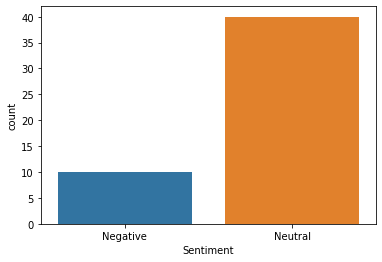

In [338]:
import seaborn as sns
#plotting sentiment for profanity df, no positivity seen here,
#but it is a very small subset of data compared to the clean df
#Not as much negativity as initially expected
sns.countplot(profanitydf['Sentiment'])

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

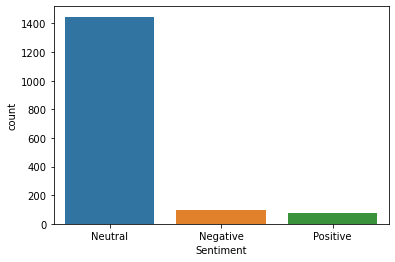

In [339]:
#plotting sentiment for clean df
sns.countplot(cleandf['Sentiment'])

In [349]:
#Connecting both dfs
frames = [profanitydf, cleandf]
result = pd.concat(frames)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

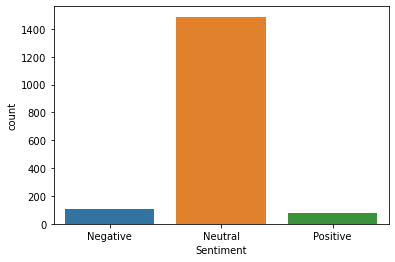

In [348]:
#plotting both overlapping sets combined
sns.countplot(result['Sentiment'])